AP: Note that I have converted previous step cells to markdown cells to reduce system resource usage (just faster to rerun code so slower cells don't slow me down) (Mostly just the cells that made plots)

# August Perez Capstone Two Project:
## Asthma prediction model

The goal is to build a model with at least 90% sensitivity (recall) (focusing on reducing false negatives)

Data source: Asthma Disease Dataset (https://www.kaggle.com/datasets/rabieelkharoua/asthma-disease-dataset?resource=download)

#### About the dataset: (from the kaggle description)
- health information for 2,392 patients
  - includes demographic details, lifestyle factors, environmental and allergy factors, medical history, clinical measurements, symptoms, and a diagnosis indicator


Column Info: (from Kaggle description)
Patient ID

    PatientID: A unique identifier assigned to each patient (5034 to 7425).

Demographic Details

    Age: The age of the patients ranges from 5 to 80 years.
    Gender: Gender of the patients, where 0 represents Male and 1 represents Female.
    Ethnicity: The ethnicity of the patients, coded as follows:
    0: Caucasian
    1: African American
    2: Asian
    3: Other
    EducationLevel: The education level of the patients, coded as follows:
    0: None
    1: High School
    2: Bachelor's
    3: Higher

Lifestyle Factors

    BMI: Body Mass Index of the patients, ranging from 15 to 40.
    Smoking: Smoking status, where 0 indicates No and 1 indicates Yes.
    PhysicalActivity: Weekly physical activity in hours, ranging from 0 to 10.
    DietQuality: Diet quality score, ranging from 0 to 10.
    SleepQuality: Sleep quality score, ranging from 4 to 10.

Environmental and Allergy Factors

    PollutionExposure: Exposure to pollution, score from 0 to 10.
    PollenExposure: Exposure to pollen, score from 0 to 10.
    DustExposure: Exposure to dust, score from 0 to 10.
    PetAllergy: Pet allergy status, where 0 indicates No and 1 indicates Yes.

Medical History

    FamilyHistoryAsthma: Family history of asthma, where 0 indicates No and 1 indicates Yes.
    HistoryOfAllergies: History of allergies, where 0 indicates No and 1 indicates Yes.
    Eczema: Presence of eczema, where 0 indicates No and 1 indicates Yes.
    HayFever: Presence of hay fever, where 0 indicates No and 1 indicates Yes.
    GastroesophagealReflux: Presence of gastroesophageal reflux, where 0 indicates No and 1 indicates Yes.

Clinical Measurements

    LungFunctionFEV1: Forced Expiratory Volume in 1 second (FEV1), ranging from 1.0 to 4.0 liters.
    LungFunctionFVC: Forced Vital Capacity (FVC), ranging from 1.5 to 6.0 liters.

Symptoms

    Wheezing: Presence of wheezing, where 0 indicates No and 1 indicates Yes.
    ShortnessOfBreath: Presence of shortness of breath, where 0 indicates No and 1 indicates Yes.
    ChestTightness: Presence of chest tightness, where 0 indicates No and 1 indicates Yes.
    Coughing: Presence of coughing, where 0 indicates No and 1 indicates Yes.
    NighttimeSymptoms: Presence of nighttime symptoms, where 0 indicates No and 1 indicates Yes.
    ExerciseInduced: Presence of symptoms induced by exercise, where 0 indicates No and 1 indicates Yes.

Diagnosis Information

    Diagnosis: Diagnosis status for Asthma, where 0 indicates No and 1 indicates Yes.

Confidential Information

    DoctorInCharge: This column contains confidential information about the doctor in charge, with "Dr_Confid" as the value for all patients.


#### Imports:

In [69]:
%matplotlib inline

#data manipulation and math

import numpy as np
import scipy as sp
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

#plotting and visualization

import matplotlib.pyplot as plt
import seaborn as sns

#modeling & pre-processing
import sklearn.model_selection
import sklearn.metrics
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
plt.rcParams['figure.figsize'] = [6,6]

#### Set random seed for reproducability
Note that this should not be done for models used in real-world applications

In [3]:
np.random.seed(9)

#### Load the data into a pandas df

In [4]:
df_adhd = pd.read_csv('asthma_disease_data.csv')
df_adhd.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,PetAllergy,FamilyHistoryAsthma,HistoryOfAllergies,Eczema,HayFever,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,2.855578,0.974339,1,1,0,0,0,0,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,7.457665,6.584631,0,0,1,0,0,0,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,1.448189,5.445799,0,1,1,0,1,0,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,7.571845,3.965316,0,0,0,0,1,0,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,3.049807,8.260605,0,0,0,0,1,0,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [5]:
print('shape:', df_adhd.shape,'\n')
print('columns:\n','\n'.join(list(df_adhd.columns)))
print('\nnumber of cols:', len(df_adhd.columns))

shape: (2392, 29) 

columns:
 PatientID
Age
Gender
Ethnicity
EducationLevel
BMI
Smoking
PhysicalActivity
DietQuality
SleepQuality
PollutionExposure
PollenExposure
DustExposure
PetAllergy
FamilyHistoryAsthma
HistoryOfAllergies
Eczema
HayFever
GastroesophagealReflux
LungFunctionFEV1
LungFunctionFVC
Wheezing
ShortnessOfBreath
ChestTightness
Coughing
NighttimeSymptoms
ExerciseInduced
Diagnosis
DoctorInCharge

number of cols: 29


AP: Removing index location 476. lungfunctionfvc=0 when data is scaled. Removing from original df so that when data is split there isn't a mismatch of rows, and less code to write for me

In [6]:
#AP: Causing headache, more problems pop up, just going to impute the single NaN value for lungfunctionfvc at index 476 in X_scaled. Single data point so shouldn't have noticable change on model outputs
#df_adhd.drop(476, inplace=True)

# Data Wrangling

In [7]:
df_adhd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

AP: No null values found, making my job here easier than expected.

In [8]:
#AP: Looking at col names to ensure they make sense
df_adhd.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,PetAllergy,FamilyHistoryAsthma,HistoryOfAllergies,Eczema,HayFever,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,2.855578,0.974339,1,1,0,0,0,0,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,7.457665,6.584631,0,0,1,0,0,0,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,1.448189,5.445799,0,1,1,0,1,0,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,7.571845,3.965316,0,0,0,0,1,0,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,3.049807,8.260605,0,0,0,0,1,0,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


##### AP: Col names to edit:
- Change all to lower case (mainly makes my typing easier/faster)
- 

In [9]:
#AP: change col names to lower case
df_adhd.columns = df_adhd.columns.str.lower()
df_adhd.head()

,patientid,age,gender,ethnicity,educationlevel,bmi,smoking,physicalactivity,dietquality,sleepquality,pollutionexposure,pollenexposure,dustexposure,petallergy,familyhistoryasthma,historyofallergies,eczema,hayfever,gastroesophagealreflux,lungfunctionfev1,lungfunctionfvc,wheezing,shortnessofbreath,chesttightness,coughing,nighttimesymptoms,exerciseinduced,diagnosis,doctorincharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,2.855578,0.974339,1,1,0,0,0,0,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,7.457665,6.584631,0,0,1,0,0,0,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,1.448189,5.445799,0,1,1,0,1,0,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,7.571845,3.965316,0,0,0,0,1,0,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,3.049807,8.260605,0,0,0,0,1,0,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


#### Check the data types, ensure they make sense for the column

In [10]:
df_adhd.dtypes

patientid                   int64
age                         int64
gender                      int64
ethnicity                   int64
educationlevel              int64
bmi                       float64
smoking                     int64
physicalactivity          float64
dietquality               float64
sleepquality              float64
pollutionexposure         float64
pollenexposure            float64
dustexposure              float64
petallergy                  int64
familyhistoryasthma         int64
historyofallergies          int64
eczema                      int64
hayfever                    int64
gastroesophagealreflux      int64
lungfunctionfev1          float64
lungfunctionfvc           float64
wheezing                    int64
shortnessofbreath           int64
chesttightness              int64
coughing                    int64
nighttimesymptoms           int64
exerciseinduced             int64
diagnosis                   int64
doctorincharge             object
dtype: object

##### AP: Data types check out. doctorincharge col has every value as "Dr_Confid" so object type makes sense.

#### Visualize the data
Detection of possible duplicates and outliers

df_adhd.hist(figsize=(8,8))
plt.tight_layout()
plt.show()

AP: Most of the data is categorical between 0 or 1 (yes or no)
Continuous values don't seem to have any specific distribution


In [11]:
#AP: Make list of cols that are non-categorical in nature

non_cat_cols = ['age', 'bmi', 'physicalactivity', 'dietquality', 'sleepquality', 'pollutionexposure', 'pollenexposure', 'dustexposure', 'lungfunctionfev1', 'lungfunctionfvc']

#AP: box & whisker plot to see potential outliers
df_adhd[non_cat_cols].boxplot(rot=34)
plt.tight_layout()
plt.show()

## Boxplot without age & bmi so other columns can be inspected more closely

non_cat_cols_noagebmi = [element for element in non_cat_cols if element != 'age' and element != 'bmi']
df_adhd[non_cat_cols_noagebmi].boxplot(rot=35)
plt.tight_layout()
plt.show()

AP: No outliers seen, max & min's seem reasonable for non-categorical cols

#### A look at consistency in values within columns
ex. categorical values are within specified ranges, numerical values are within reasonable ranges for the metric measured

In [12]:
df_adhd.nunique(axis=0)

patientid                 2392
age                         75
gender                       2
ethnicity                    4
educationlevel               4
bmi                       2392
smoking                      2
physicalactivity          2392
dietquality               2392
sleepquality              2392
pollutionexposure         2392
pollenexposure            2392
dustexposure              2392
petallergy                   2
familyhistoryasthma          2
historyofallergies           2
eczema                       2
hayfever                     2
gastroesophagealreflux       2
lungfunctionfev1          2392
lungfunctionfvc           2392
wheezing                     2
shortnessofbreath            2
chesttightness               2
coughing                     2
nighttimesymptoms            2
exerciseinduced              2
diagnosis                    2
doctorincharge               1
dtype: int64

 AP: The count of unique values within each column is consistent with expectations

## Data Wrangling Conclusions:

- Data is tidy (each observation is a row, each variable is a col)
- No null values found, making my job here easier than expected.
- Data types for each col check out. (all but doctorincharge are numerical int or float) (doctorincharge col has every value as "Dr_Confid" so object type makes sense)
- Continuous values don't seem to have any specific distribution (flat). Most of the data is categorical (17 out of 29 cols) between 0 or 1 (yes or no).
- No outliers detected, max & min's seem reasonable for non-categorical cols
- The count of unique values within each column is consistent with expectations (as many unique values for cat cols as there are categories for that col; and for all but 'age' col, unique values equals sample count)

# EDA

The Data Wrangling performed above did change the dataset in that col names are now all lower case, no other changes were made.

EDA Major Tasks:

1. Form hypotheses/develop investigation themes to explore
2. Exploration of each individual variable
3. Assessment of the relationship between each variable and the target variable
4. Assessment of the interaction between variables
5. Exploration of data across many dimensions

Target Variable: 'diagnosis'

In [13]:
df_adhd.head()

,patientid,age,gender,ethnicity,educationlevel,bmi,smoking,physicalactivity,dietquality,sleepquality,pollutionexposure,pollenexposure,dustexposure,petallergy,familyhistoryasthma,historyofallergies,eczema,hayfever,gastroesophagealreflux,lungfunctionfev1,lungfunctionfvc,wheezing,shortnessofbreath,chesttightness,coughing,nighttimesymptoms,exerciseinduced,diagnosis,doctorincharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,2.855578,0.974339,1,1,0,0,0,0,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,7.457665,6.584631,0,0,1,0,0,0,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,1.448189,5.445799,0,1,1,0,1,0,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,7.571845,3.965316,0,0,0,0,1,0,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,3.049807,8.260605,0,0,0,0,1,0,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


## List of hypothesis' to consider

- Before fully investigating data: (just looking at rows and columns, plus the quick visualizations from data wrangling steps)
    - a diagnosis of asthma (1) occurs with low lung FEV & FVC
    - a diagnosis of asthma (1) occurs with >1 symptom being present
    - smoking has a high correlation with asthma diagnosis
    - increased bmi is correlated with asthma diagnosis
    - ethnicity does not affect asthma diagnosis
        - acknowledging the possibility of cultural differences that can occur within ethnicity groups that could affect Lifestyle & Environmental and Allergy Factors
- During EDA:
    - fdsf

#### Drop unnecessary cols

cols  only for imformational purposes: (shouldn't be used in calculations/modeling)
- patientid
    - unique identifier that would matter for tracking specific patients, not for model creation (can use the numbered index for that if needed)
- doctorincharge
    - all rows have identical value

In [14]:
df_adhd.drop(['patientid', 'doctorincharge'], axis=1, inplace=True)
df_adhd.head()

,age,gender,ethnicity,educationlevel,bmi,smoking,physicalactivity,dietquality,sleepquality,pollutionexposure,pollenexposure,dustexposure,petallergy,familyhistoryasthma,historyofallergies,eczema,hayfever,gastroesophagealreflux,lungfunctionfev1,lungfunctionfvc,wheezing,shortnessofbreath,chesttightness,coughing,nighttimesymptoms,exerciseinduced,diagnosis
0,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,2.855578,0.974339,1,1,0,0,0,0,1.369051,4.941206,0,0,1,0,0,1,0
1,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,7.457665,6.584631,0,0,1,0,0,0,2.197767,1.702393,1,0,0,1,1,1,0
2,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,1.448189,5.445799,0,1,1,0,1,0,1.698011,5.022553,1,1,1,0,1,1,0
3,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,7.571845,3.965316,0,0,0,0,1,0,3.032037,2.300159,1,0,1,1,1,0,0
4,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,3.049807,8.260605,0,0,0,0,1,0,3.470589,3.067944,1,1,1,0,0,1,0


In [15]:
#AP Making lists of categorical features and continuous features

cols_num = []
cols_cat = []

for col in df_adhd.columns:
    if df_adhd[col].nunique() <= 4:
        cols_cat.append(col)
    elif df_adhd[col].nunique() > 4:
        cols_num.append(col)
print('num_cols:\n', cols_num, '\nlen:', len(cols_num))
print('\ncat_cols:\n', cols_cat, '\nlen:', len(cols_cat))

print('\n')
if len(set(cols_num) & set(cols_cat)) > 0:
    print("col split didn't work right")
else:
    print('Good job August!')

num_cols:
 ['age', 'bmi', 'physicalactivity', 'dietquality', 'sleepquality', 'pollutionexposure', 'pollenexposure', 'dustexposure', 'lungfunctionfev1', 'lungfunctionfvc'] 
len: 10

cat_cols:
 ['gender', 'ethnicity', 'educationlevel', 'smoking', 'petallergy', 'familyhistoryasthma', 'historyofallergies', 'eczema', 'hayfever', 'gastroesophagealreflux', 'wheezing', 'shortnessofbreath', 'chesttightness', 'coughing', 'nighttimesymptoms', 'exerciseinduced', 'diagnosis'] 
len: 17


Good job August!


In [16]:
df_adhd_num = pd.concat([df_adhd[cols_num], df_adhd['diagnosis']], axis=1)
df_adhd_cat = df_adhd[cols_cat] #don't need to add 'diagnosis col since it will already be included'

### Explore each variable

#### Descriptive stats

#AP: numerical columns
df_adhd[cols_num].describe().T

#AP: categorical columns
df_adhd[cols_cat].describe().T

#AP: Change cat cols to dtype 'category' for better describe()

df_adhd[cols_cat].astype('category').describe().T

#### Plotting

#histograms of categorical cols

df_adhd[cols_cat].hist()
plt.tight_layout()
plt.show()

#histograms of numerical cols

df_adhd[cols_num].hist()
plt.tight_layout()
plt.show()

All columns have relatively flat distributions, indicating potentially good sampling technique from the population

### Looking at rows where diagnosis=1 and seeing those relationships

df_adhd[df_adhd['diagnosis']==1].hist(figsize=(8,8))
plt.tight_layout()
plt.show()

This shows a more interesting picture. I'd like to overlay the opposing plot (diagnosis=0) on this to make a comparison (different colors and either step style or play with alpha value)

for col in df_adhd.columns:
    plt.figure(figsize=(6,3))
    sns.histplot(df_adhd, x=df_adhd[col], kde=True, bins='auto', hue='diagnosis')
    plt.title(col)
    plt.show()

#AP: distributions where diagnosis=1 & 0 to compare since y-scale too large to effectively investigate diagnosis=1 histograms

for col in df_adhd.columns:
    df_adhd_1 = df_adhd[df_adhd['diagnosis']==1]
    plt.figure(figsize=(6,3))
    sns.histplot(df_adhd_1, x=df_adhd_1[col], kde=True, bins='auto')
    plt.title(f'{col} (diagnosis=1)')
    plt.show()
    
    df_adhd_0 = df_adhd[df_adhd['diagnosis']==0]
    plt.figure(figsize=(6,3))
    sns.histplot(df_adhd_0, x=df_adhd[col], kde=True, bins='auto')
    plt.title(f'{col} (diagnosis=0)')
    plt.show()

#AP: turning into markdown cell, sns.histplot does this better & prettier. Keeping this code to look back on in future

#AP: plotting the distributions of all continuous cols, making comparison between diagnosis=0 & diagnosis=1 
for col in df_adhd_num.columns:
    fig1, ax1 = plt.subplots()
    fig1.set_size_inches(w=4.0, h=2.5)
    ax1.hist(x=col, data=df_adhd_num[df_adhd_num['diagnosis']==1], alpha=0.5, color='b', label='Diagnosis=1', histtype='step')
    ax1.hist(x=col, data=df_adhd_num[df_adhd_num['diagnosis']==0], alpha=0.5, color='r', label='Diagnosis=0', histtype='step')
    ax1.hist(x=col, data=df_adhd_num, alpha=0.5, color='g', label='All Data', histtype='step')
    ax1.set_title(f'{col} column')
    ax1.legend(loc='best', fontsize='x-small')
    plt.show()

#AP: seperated distributions of cont cols, since overlaid hist plots can't show much detail of these due to diagnosis=0 makes y-axis range too high
df_adhd_num[df_adhd_num['diagnosis']==1].hist(figsize=(6,6))
plt.tight_layout()
plt.show()

#### Continuous col Comparitive distribution takeaways:

- Many fewer samples for diagnosis=1 than diagnosis=0
- Generally flat distributions for both diagnosis=0 & diagnosis=1
- No clear indication of a feature that differs between 1 or 0 for diagnosis
    - will be trying scatter plots next to investigate correlation between continuous features and target

#AP: turning into markdown cell, sns.histplot does this better & prettier. Keeping this code to look back on in future

#AP: plotting the distributions of all categorical cols, making comparison between diagnosis=0 & diagnosis=1

for col in df_adhd_cat.columns:
    fig2, ax2 = plt.subplots()
    fig2.set_size_inches(w=4.0, h=2.5)
    ax2.hist(x=col, data=df_adhd_cat[df_adhd_cat['diagnosis']==1], alpha=0.5, color='b', label='Diagnosis=1', histtype='step')
    ax2.hist(x=col, data=df_adhd_cat[df_adhd_cat['diagnosis']==0], alpha=0.5, color='r', label='Diagnosis=0', histtype='step')
    ax2.hist(x=col, data=df_adhd_cat, alpha=0.5, color='g', label='All Data', histtype='step')
    ax2.set_title(f'{col} column')
    ax2.legend(loc='best', fontsize='x-small')
    plt.show()

#AP: seperated distributions of cat cols, since overlaid hist plots can't show much detail of these due to diagnosis=0 makes y-axis range too high
df_adhd_cat[df_adhd_cat['diagnosis']==1].hist(figsize=(6,6))
plt.tight_layout(pad=0.3)
plt.show()

#### Categorical col Comparitive distribution takeaways:

- Many fewer samples for diagnosis=1 than diagnosis=0
- Presence of symptoms has potential for use in asthma prediction, diagnosis=1 mostly shows symptoms being present more often than not
    - Kind of expected since diagnosis is usually based on symptoms
- Other cols (non-symptoms) are not showing me a clear difference between diagnosis 0 or 1

### Scatter plots of contininuous cols to investigate if there is a relationship to target

#AP: plotting the distributions of all continuous cols, making comparison between diagnosis=0 & diagnosis=1 

#for col in df_adhd_num.columns:
    #fig1, ax1 = plt.subplots()
    #fig1.set_size_inches(w=4.0, h=2.5)
    #ax1.scatter(x=col, y='diagnosis', data=df_adhd_num, alpha=0.5, color='b',)
    #ax1.plot(x=col, data=df_adhd_num[df_adhd_num['diagnosis']==0], alpha=0.5, color='r', label='Diagnosis=0', histtype='step')
    #ax1.set_title(f'{col} column')
    #ax1.legend(loc='best', fontsize='x-small')
    #plt.show()

AP: Of course a scatter plot wouldn't work when plotting vs a binary variable. Distributions & comparing between diagnosis= 0 or 1 helps draw clearer picture of relationships

### Visualizing possible relationships with a heatmap

plt.figure(figsize=(12,10))
sns.heatmap(df_adhd.corr(), annot=False)
    #AP: lighter means more correlation

#Heatmap of only continuous features: (easier for eyes to digest the plot)

plt.figure(figsize=(12,10))
sns.heatmap(df_adhd_num.corr(), annot=True)

#Heatmap of only categorical features: (easier for eyes to digest the plot)

plt.figure(figsize=(12,10))
sns.heatmap(df_adhd_cat.corr(), annot=False)

Pairplot with blue as diagnosis=0 & orange as diagnosis=1
Used to "quickly" investigate if there is any relationship between different features

#AP Pairplot for the continuous cols (cat cols would not be helpful since values are just 0 or 1)
sns.pairplot(df_adhd_num, hue='diagnosis')
plt.show()

## EDA Conclusions

### Comments on the data itself:

- The sampling from the population for this dataset seems well done in that it doesn't seem biased towards lower, upper or middle ranges for the **continuous** features
- Distributions for continuos cols are relatively flat
    - pollenexposure is *almost* bimodal, but not clear enough for me to confidently classify it as such
- Categorical cols showing skewness towards value of 0, indication non-presence of the feature)
    - smoking, petallergy, familyhistoryasthma, eczema, hayfever, gastroesophagealreflux, diagnosis (the target feature)
    - Skewniss not surprising since these features should be in minority within the population
- Categorical cols showing skewness towards value of 1, indication presence of the feature)
    - wheezing, nighttimesymptoms, exerciseinduced
    - each feature only 200 "1" samples more than "0" in 2392 sample dataset (close to 60% of samples with "1" value for each of the features)

### Relationships between each feature & target

- Continuous cols:
    - No feature shows a true relationship between a lower, middle, or upper range and a diagnosis=1
    -  lungfunctionfev1 & lungfunctionfvc both show a potential that a higher value may correlate with a diagnosis=1, this appears to be a week relationship at current investigative stages
    -  dustexposure seems to correlate to diagnosis=1 with lower values
        - I would have originally expected higher values to correlate
- Categorical cols:
    - All cat cols except those listed below have distributions that are a very close match between diagnosis=0 & =1
    - Cat cols with non matching distributions between diagnosis= 0 or 1 & notes
        - shortnessofbreath: fewer shortnessofbreath=1 than =0 where diag=1 (where diag=0, ratio between shortnessofbreath=0 or 1 was just about equal)
        -  chesttightness: fewer chesttightness=1 than =0 where diag=1 (where diag=0, ratio between chesttightness=0 or 1 was just about equal)
        -  coughing: fewer coughing=1 than =0 where diag=1 (where diag=0, ratio between coughing=0 or 1 was just about equal)

### Inter-feature relationships:

- No strong realtionships between features found using heatmaps or pairplots

### Next steps thoughts:

- Explore if combinations of features (& which combos) correlate with the target
    - ex. does a combo of bmi & PollutionExposure result in diag=1 when both those values are high?
    - Kind of already done with the pairplot since colored points based of diagnosis value

# Preprocessing and Training Data Development

AP: Note that I have converted previous step cells to markdown cells to reduce system resource usage (just faster to rerun code so slower cells don't slow me down) (Mostly just the cells that made plots)

usefull vars I've made:

- df_adhd_num : the continuous/numerical columns
- df_adhd_cat : the categorical columns. Values are mostly binary (0 or 1)

Goal: Create a cleaned development dataset you can use to complete the
modeling step of your project.

Steps:

- Dummy features for categorical variables
- Standardize the magnitude of numeric features using a scaler
- Split data into testing and training datasets

Optional Steps: (If I can include within reasonable timeframe and effort)

- create new features based on existing features
    - ex. combine multiple cat cols to see if there's a min threshold of feature=1 (presence of feature) for diagnosis=1

## Dummy features for categorical variables

In [17]:
df_adhd_cat.head()

,gender,ethnicity,educationlevel,smoking,petallergy,familyhistoryasthma,historyofallergies,eczema,hayfever,gastroesophagealreflux,wheezing,shortnessofbreath,chesttightness,coughing,nighttimesymptoms,exerciseinduced,diagnosis
0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0
1,1,2,2,0,0,0,1,0,0,0,1,0,0,1,1,1,0
2,0,2,1,0,0,1,1,0,1,0,1,1,1,0,1,1,0
3,1,2,1,0,0,0,0,0,1,0,1,0,1,1,1,0,0
4,0,0,3,0,0,0,0,0,1,0,1,1,1,0,0,1,0


In [18]:
df_adhd_cat.dtypes

gender                    int64
ethnicity                 int64
educationlevel            int64
smoking                   int64
petallergy                int64
familyhistoryasthma       int64
historyofallergies        int64
eczema                    int64
hayfever                  int64
gastroesophagealreflux    int64
wheezing                  int64
shortnessofbreath         int64
chesttightness            int64
coughing                  int64
nighttimesymptoms         int64
exerciseinduced           int64
diagnosis                 int64
dtype: object

In [19]:
df_adhd_cat.nunique()

gender                    2
ethnicity                 4
educationlevel            4
smoking                   2
petallergy                2
familyhistoryasthma       2
historyofallergies        2
eczema                    2
hayfever                  2
gastroesophagealreflux    2
wheezing                  2
shortnessofbreath         2
chesttightness            2
coughing                  2
nighttimesymptoms         2
exerciseinduced           2
diagnosis                 2
dtype: int64

AP: nunique shows that there is already limited values for each col, suggesting non-continuous

In [20]:
for col in df_adhd_cat.columns:
    print(df_adhd_cat[col].value_counts().sort_index())

gender
0    1212
1    1180
Name: count, dtype: int64
ethnicity
0    1465
1     475
2     229
3     223
Name: count, dtype: int64
educationlevel
0    478
1    933
2    749
3    232
Name: count, dtype: int64
smoking
0    2053
1     339
Name: count, dtype: int64
petallergy
0    1995
1     397
Name: count, dtype: int64
familyhistoryasthma
0    1672
1     720
Name: count, dtype: int64
historyofallergies
0    1437
1     955
Name: count, dtype: int64
eczema
0    1933
1     459
Name: count, dtype: int64
hayfever
0    1786
1     606
Name: count, dtype: int64
gastroesophagealreflux
0    2014
1     378
Name: count, dtype: int64
wheezing
0     966
1    1426
Name: count, dtype: int64
shortnessofbreath
0    1195
1    1197
Name: count, dtype: int64
chesttightness
0    1188
1    1204
Name: count, dtype: int64
coughing
0    1188
1    1204
Name: count, dtype: int64
nighttimesymptoms
0     951
1    1441
Name: count, dtype: int64
exerciseinduced
0     945
1    1447
Name: count, dtype: int64
diagnosis
0   

AP: each col is confirmed to already be encoded such that I don't need to create dummy variables

## Make X & y

In [21]:
#X's so I can transform continuous/numerical cols and merge the categorical cols back in
X_num = df_adhd_num.drop('diagnosis', axis=1)
X_cat = df_adhd_cat.drop('diagnosis', axis=1)

#The real X & y
X =  df_adhd.drop('diagnosis', axis=1)
y = pd.DataFrame(df_adhd['diagnosis'])

In [22]:
print(X_num.shape)
print(X_cat.shape)

(2392, 10)
(2392, 16)


## Standardize the magnitude of numeric features using a scaler

In [23]:
scaler_insta = sklearn.preprocessing.MinMaxScaler()

scaler = scaler_insta.fit(X_num)

In [24]:
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, columns=X_num.columns)
print(X_scaled.shape)
X_scaled.head()

(2392, 10)


,age,bmi,physicalactivity,dietquality,sleepquality,pollutionexposure,pollenexposure,dustexposure,lungfunctionfev1,lungfunctionfvc
0,0.783784,0.032738,0.089324,0.548738,0.783941,0.738898,0.285523,0.097217,0.122894,0.764809
1,0.283784,0.309582,0.589909,0.633997,0.192255,0.196922,0.745783,0.658399,0.399201,0.044973
2,0.702703,0.134793,0.674163,0.919608,0.473612,0.145987,0.144769,0.544485,0.232575,0.782888
3,0.472973,0.941078,0.140359,0.582532,0.041970,0.058100,0.757202,0.396396,0.677360,0.177828
4,0.756757,0.170395,0.460548,0.312499,0.938207,0.098005,0.304948,0.826042,0.823580,0.348470


In [25]:
X_scaled = pd.concat([X_scaled, X_cat], axis=1)

print(f'shape: {X_scaled.shape}')
X_scaled.head()

shape: (2392, 26)


,age,bmi,physicalactivity,dietquality,sleepquality,pollutionexposure,pollenexposure,dustexposure,lungfunctionfev1,lungfunctionfvc,gender,ethnicity,educationlevel,smoking,petallergy,familyhistoryasthma,historyofallergies,eczema,hayfever,gastroesophagealreflux,wheezing,shortnessofbreath,chesttightness,coughing,nighttimesymptoms,exerciseinduced
0,0.783784,0.032738,0.089324,0.548738,0.783941,0.738898,0.285523,0.097217,0.122894,0.764809,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1
1,0.283784,0.309582,0.589909,0.633997,0.192255,0.196922,0.745783,0.658399,0.399201,0.044973,1,2,2,0,0,0,1,0,0,0,1,0,0,1,1,1
2,0.702703,0.134793,0.674163,0.919608,0.473612,0.145987,0.144769,0.544485,0.232575,0.782888,0,2,1,0,0,1,1,0,1,0,1,1,1,0,1,1
3,0.472973,0.941078,0.140359,0.582532,0.041970,0.058100,0.757202,0.396396,0.677360,0.177828,1,2,1,0,0,0,0,0,1,0,1,0,1,1,1,0
4,0.756757,0.170395,0.460548,0.312499,0.938207,0.098005,0.304948,0.826042,0.823580,0.348470,0,0,3,0,0,0,0,0,1,0,1,1,1,0,0,1


AP: this is where that NaN row gets inserted somehow, just gonna remove it

In [26]:
#X_scaled.drop(2391, inplace=True)

In [27]:
#print(X_scaled.isnull().sum())
#X_scaled[pd.isna(X_scaled)]

### Reasoning behind scaler choice:
I chose a MinMaxScaler instead of StandardScaler because having values range from 0 to 1 makes more sense in my head than having the values centered around zero. Essentially 0 & 1 represent the min and max values of the feature with the values in between scaled to essentially be a proportion of where they lay in the range from the original min to max values

## Feature Engineering

Making new features based on the "category" each feature falls in, seeing if & how that would help

- lifequality would combine ['physicalactivity', 'dietquality', 'sleepquality']
- exposure combines: ['pollutionexposure', 'pollenexposure', 'dustexposure', 'smoking']
- lungfunction: ['lungfunctionfev1', 'lungfunctionfvc']
- allergy: ['petallergy', 'historyofallergies', 'eczema', 'hayfever']
- symptoms: ['gastroesophagealreflux', 'wheezing', 'shortnessofbreath', 'chesttightness', 'coughing', 'nighttimesymptoms', 'exerciseinduced']

AP: Going to just impute the mean for that single NaN value, dropping the row is causing too many problems

In [28]:
print('before:', X_scaled['lungfunctionfvc'].iloc[476])

X_scaled['lungfunctionfvc'].iat[476] = X_scaled['lungfunctionfvc'].mean()

print('after:', X_scaled['lungfunctionfvc'].iloc[476])

before: 0.0
after: 0.4981190752970845


In [29]:
X_scaled['lifequality'] = X_scaled[['physicalactivity', 'dietquality', 'sleepquality']].mean(axis=1)
X_scaled['exposure_count'] = X_scaled[['pollutionexposure', 'pollenexposure', 'dustexposure', 'smoking']].mean(axis=1)
X_scaled['lungfunction'] = X_scaled['lungfunctionfev1'] / X_scaled['lungfunctionfvc']
X_scaled['allergy_count'] = X_scaled[['petallergy', 'historyofallergies', 'eczema', 'hayfever']].sum(axis=1)
X_scaled['symptom_count'] = X_scaled[['gastroesophagealreflux', 'wheezing', 'shortnessofbreath', 'chesttightness', 'coughing', 'nighttimesymptoms', 'exerciseinduced']].sum(axis=1)

print(f'shape: {X_scaled.shape}')
X_scaled.head()

shape: (2392, 31)


,age,bmi,physicalactivity,dietquality,sleepquality,pollutionexposure,pollenexposure,dustexposure,lungfunctionfev1,lungfunctionfvc,gender,ethnicity,educationlevel,smoking,petallergy,familyhistoryasthma,historyofallergies,eczema,hayfever,gastroesophagealreflux,wheezing,shortnessofbreath,chesttightness,coughing,nighttimesymptoms,exerciseinduced,lifequality,exposure_count,lungfunction,allergy_count,symptom_count
0,0.783784,0.032738,0.089324,0.548738,0.783941,0.738898,0.285523,0.097217,0.122894,0.764809,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0.474001,0.280410,0.160687,1,2
1,0.283784,0.309582,0.589909,0.633997,0.192255,0.196922,0.745783,0.658399,0.399201,0.044973,1,2,2,0,0,0,1,0,0,0,1,0,0,1,1,1,0.472053,0.400276,8.876550,1,4
2,0.702703,0.134793,0.674163,0.919608,0.473612,0.145987,0.144769,0.544485,0.232575,0.782888,0,2,1,0,0,1,1,0,1,0,1,1,1,0,1,1,0.689128,0.208810,0.297073,2,5
3,0.472973,0.941078,0.140359,0.582532,0.041970,0.058100,0.757202,0.396396,0.677360,0.177828,1,2,1,0,0,0,0,0,1,0,1,0,1,1,1,0,0.254954,0.302925,3.809076,1,4
4,0.756757,0.170395,0.460548,0.312499,0.938207,0.098005,0.304948,0.826042,0.823580,0.348470,0,0,3,0,0,0,0,0,1,0,1,1,1,0,0,1,0.570418,0.307249,2.363415,1,4


In [30]:
#AP: Curious to look at the combo features and their relationship to the target
feat_check = pd.concat([X_scaled, y], axis=1)

#sns.pairplot(feat_check[['lifequality', 'exposure_count', 'lungfunction', 'allergy_count', 'symptom_count', 'diagnosis']], hue='diagnosis')

AP: No new relationship uncovered using the pairplot.
commenting out so I can rerun code cells without waiting for the pairplot to load through again

In [31]:
feat_check_0 = feat_check[feat_check['diagnosis']==0]
feat_check_1 = feat_check[feat_check['diagnosis']==1]

print('diagnosis=0')
print(feat_check_0[['lifequality', 'exposure_count', 'lungfunction', 'allergy_count', 'symptom_count']].describe())
print('\n')
print('diagnosis=1')
print(feat_check_1[['lifequality', 'exposure_count', 'lungfunction', 'allergy_count', 'symptom_count']].describe())

diagnosis=0
       lifequality  exposure_count  lungfunction  allergy_count  symptom_count
count  2268.000000     2268.000000   2268.000000    2268.000000    2268.000000
mean      0.503154        0.413780      4.055409       1.014550       3.469136
std       0.172147        0.152193     22.609884       0.851196       1.278722
min       0.053122        0.038487      0.000000       0.000000       0.000000
25%       0.380355        0.305505      0.542078       0.000000       3.000000
50%       0.504878        0.405196      1.028707       1.000000       3.000000
75%       0.627299        0.506127      2.051525       2.000000       4.000000
max       0.967983        0.947751    550.556127       4.000000       7.000000


diagnosis=1
       lifequality  exposure_count  lungfunction  allergy_count  symptom_count
count   124.000000      124.000000    124.000000     124.000000     124.000000
mean      0.511818        0.401231      6.127398       0.935484       3.459677
std       0.159251        

In [32]:
X_scaled['lungfunction'].sort_values(ascending=False)
#X_scaled[['lungfunctionfev1', 'lungfunctionfvc', 'lungfunction']].iloc[476]

574     550.556127
2302    500.395800
1579    439.925738
1428    417.614476
213     344.412590
           ...    
1945      0.002172
628       0.001140
241       0.000618
16        0.000212
411       0.000000
Name: lungfunction, Length: 2392, dtype: float64

In [33]:
X_scaled[['lungfunctionfev1', 'lungfunctionfvc', 'lungfunction']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   lungfunctionfev1  2392 non-null   float64
 1   lungfunctionfvc   2392 non-null   float64
 2   lungfunction      2392 non-null   float64
dtypes: float64(3)
memory usage: 56.2 KB


AP: at index 476, lungfunctionfvc has a value of 0 so it's messing with some functions, removing it from original dataframe so that should remove it from variables based off the df

In [34]:
X_scaled.iloc[2391]

age                       0.283784
bmi                       0.524618
physicalactivity          0.161235
dietquality               0.741216
sleepquality              0.752455
pollutionexposure         0.323135
pollenexposure            0.387380
dustexposure              0.506326
lungfunctionfev1          0.426823
lungfunctionfvc           0.211860
gender                    1.000000
ethnicity                 0.000000
educationlevel            0.000000
smoking                   1.000000
petallergy                0.000000
familyhistoryasthma       1.000000
historyofallergies        0.000000
eczema                    0.000000
hayfever                  0.000000
gastroesophagealreflux    0.000000
wheezing                  1.000000
shortnessofbreath         1.000000
chesttightness            0.000000
coughing                  0.000000
nighttimesymptoms         1.000000
exerciseinduced           0.000000
lifequality               0.551636
exposure_count            0.554210
lungfunction        

In [35]:
X_scaled[pd.isna(X_scaled['age'])]

,age,bmi,physicalactivity,dietquality,sleepquality,pollutionexposure,pollenexposure,dustexposure,lungfunctionfev1,lungfunctionfvc,gender,ethnicity,educationlevel,smoking,petallergy,familyhistoryasthma,historyofallergies,eczema,hayfever,gastroesophagealreflux,wheezing,shortnessofbreath,chesttightness,coughing,nighttimesymptoms,exerciseinduced,lifequality,exposure_count,lungfunction,allergy_count,symptom_count


AP: using SelectKBest to give me suggestions on which features to focus on since distributions and relationship investigations haven't been overly fruitfull

In [36]:
k = 15 
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X_scaled, y)
selected_features = X_scaled.columns[selector.get_support()]
df_selected = X_scaled[selected_features]
print("Selected Features:\n", selected_features)

Selected Features:
 Index(['sleepquality', 'dustexposure', 'lungfunctionfev1', 'lungfunctionfvc',
       'smoking', 'hayfever', 'gastroesophagealreflux', 'wheezing',
       'chesttightness', 'coughing', 'nighttimesymptoms', 'exerciseinduced',
       'exposure_count', 'lungfunction', 'allergy_count'],
      dtype='object')


E:\Apps\Python\Anaconda\envs\Springboard\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Split data into training and testing subsets

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state=9)

In [38]:
print(f'shape of X_train: {X_train.shape}')
print(f'shape of X_test: {X_test.shape}')
print(f'shape of y_train: {y_train.shape}')
print(f'shape of y_test: {y_test.shape}')

shape of X_train: (1794, 31)
shape of X_test: (598, 31)
shape of y_train: (1794, 1)
shape of y_test: (598, 1)


# Modeling

## To-do:

- Resampling since this is an imbalanced classification problem
    - Oversampling of minority class (diagnosis=1) seems a good route to take
- 2-3 different modeling methods and evaluate performance with appropriate metrics
    - ex. models: trees/forest (entropy, Gini impurity, etc.), KNN, logistic regression
    - ex metrics: accuracy, recall, precision, and F1
- Identify best model
    - other considerations: computational complexity, scalability, and maintenance costs

## Resampling to adress imbalanced data
Leaving test data alone

In [39]:
#recombine X_train & y_train so I can do the resample, seperate them again after

df_resample = pd.concat([X_train, y_train], axis=1)
print(df_resample.info())
df_resample.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1794 entries, 267 to 382
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1794 non-null   float64
 1   bmi                     1794 non-null   float64
 2   physicalactivity        1794 non-null   float64
 3   dietquality             1794 non-null   float64
 4   sleepquality            1794 non-null   float64
 5   pollutionexposure       1794 non-null   float64
 6   pollenexposure          1794 non-null   float64
 7   dustexposure            1794 non-null   float64
 8   lungfunctionfev1        1794 non-null   float64
 9   lungfunctionfvc         1794 non-null   float64
 10  gender                  1794 non-null   int64  
 11  ethnicity               1794 non-null   int64  
 12  educationlevel          1794 non-null   int64  
 13  smoking                 1794 non-null   int64  
 14  petallergy              1794 non-null   int6

,age,bmi,physicalactivity,dietquality,sleepquality,pollutionexposure,pollenexposure,dustexposure,lungfunctionfev1,lungfunctionfvc,gender,ethnicity,educationlevel,smoking,petallergy,familyhistoryasthma,historyofallergies,eczema,hayfever,gastroesophagealreflux,wheezing,shortnessofbreath,chesttightness,coughing,nighttimesymptoms,exerciseinduced,lifequality,exposure_count,lungfunction,allergy_count,symptom_count,diagnosis
267,0.567568,0.834946,0.973737,0.710947,0.228725,0.794443,0.012803,0.541634,0.132831,0.618408,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0.637803,0.337220,0.214795,0,3,0
1123,0.486486,0.201204,0.312259,0.289796,0.271488,0.699362,0.598521,0.432343,0.605232,0.185012,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0.291181,0.432556,3.271312,1,3,0
1568,0.243243,0.248195,0.142970,0.663454,0.156804,0.121878,0.887503,0.860828,0.193610,0.406898,1,0,2,0,0,0,1,0,0,0,1,1,1,0,1,1,0.321076,0.467552,0.475820,1,5,0
1843,0.472973,0.319832,0.798510,0.954632,0.724965,0.675241,0.290904,0.449882,0.668397,0.912309,1,3,1,0,0,0,1,0,0,0,1,1,1,1,1,0,0.826035,0.354007,0.732644,1,5,0
811,0.810811,0.297068,0.011997,0.197682,0.141801,0.844228,0.626345,0.770316,0.557054,0.255748,0,1,1,0,0,1,0,0,1,1,0,1,1,0,1,1,0.117160,0.560222,2.178137,1,5,0


In [40]:
#AP: seperate df_resample based on diagnosis value
df_resample_0 = df_resample[df_resample['diagnosis']==0]
df_resample_1 = df_resample[df_resample['diagnosis']==1]
print(df_resample_0.shape)
print(df_resample_1.shape)

(1703, 32)
(91, 32)


In [41]:
df_resample_1 = df_resample_1.sample(n=1703, replace=True, random_state=9, ignore_index=True)
df_resample_1.shape

(1703, 32)

In [42]:
df_resample = pd.concat([df_resample_0, df_resample_1], axis=0, ignore_index=True)
df_resample.shape

(3406, 32)

In [43]:
df_resample.head()

,age,bmi,physicalactivity,dietquality,sleepquality,pollutionexposure,pollenexposure,dustexposure,lungfunctionfev1,lungfunctionfvc,gender,ethnicity,educationlevel,smoking,petallergy,familyhistoryasthma,historyofallergies,eczema,hayfever,gastroesophagealreflux,wheezing,shortnessofbreath,chesttightness,coughing,nighttimesymptoms,exerciseinduced,lifequality,exposure_count,lungfunction,allergy_count,symptom_count,diagnosis
0,0.567568,0.834946,0.973737,0.710947,0.228725,0.794443,0.012803,0.541634,0.132831,0.618408,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0.637803,0.337220,0.214795,0,3,0
1,0.486486,0.201204,0.312259,0.289796,0.271488,0.699362,0.598521,0.432343,0.605232,0.185012,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0.291181,0.432556,3.271312,1,3,0
2,0.243243,0.248195,0.142970,0.663454,0.156804,0.121878,0.887503,0.860828,0.193610,0.406898,1,0,2,0,0,0,1,0,0,0,1,1,1,0,1,1,0.321076,0.467552,0.475820,1,5,0
3,0.472973,0.319832,0.798510,0.954632,0.724965,0.675241,0.290904,0.449882,0.668397,0.912309,1,3,1,0,0,0,1,0,0,0,1,1,1,1,1,0,0.826035,0.354007,0.732644,1,5,0
4,0.810811,0.297068,0.011997,0.197682,0.141801,0.844228,0.626345,0.770316,0.557054,0.255748,0,1,1,0,0,1,0,0,1,1,0,1,1,0,1,1,0.117160,0.560222,2.178137,1,5,0


In [44]:
X_train = df_resample.drop('diagnosis', axis=1)
y_train = df_resample['diagnosis']

print(X_train.shape)
print(y_train.shape)

(3406, 31)
(3406,)


Now the classes (diag = 0 or 1) are balanced in the train set

## Model 1: Decision Tree

In [45]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [71]:
tree_pred = tree_model.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_pred)
tree_recall = recall_score(y_test, tree_pred)
print("Decision Tree Accuracy:", tree_accuracy)
print("Decision Tree Recall:", tree_recall)
print("\nClassification Report:\n", classification_report(y_test, tree_pred))

Decision Tree Accuracy: 0.903010033444816
Decision Tree Recall: 0.030303030303030304

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       565
           1       0.04      0.03      0.03        33

    accuracy                           0.90       598
   macro avg       0.49      0.49      0.49       598
weighted avg       0.89      0.90      0.90       598



Decision Tree without tuning:

- Accuracy: 91%
- Recall: 3%
- High scores for diagnosis=0, low scores for diagnosis=1

## Model 2: Random Forest

In [47]:
forest_model = RandomForestClassifier(n_estimators=100, random_state=9)
forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=9)

In [72]:
forest_pred = forest_model.predict(X_test)
forest_accuracy = accuracy_score(y_test, forest_pred)
forest_recall = recall_score(y_test, forest_pred)
print("Random Forest Accuracy:", forest_accuracy)
print("Random Forest Recall:", forest_recall)
print("\nClassification Report:\n", classification_report(y_test, forest_pred))

Random Forest Accuracy: 0.9448160535117057
Random Forest Recall: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       565
           1       0.00      0.00      0.00        33

    accuracy                           0.94       598
   macro avg       0.47      0.50      0.49       598
weighted avg       0.89      0.94      0.92       598



E:\Apps\Python\Anaconda\envs\Springboard\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\Apps\Python\Anaconda\envs\Springboard\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\Apps\Python\Anaconda\envs\Springboard\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

Random forest 

- Accuracy: 94%
- Recall: 0%

Performed well for diagnosis=0, extremely porrly for predicting diagnosis=1

## Model 3: KNN

In [50]:
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='kd_tree')
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', weights='distance')

In [73]:
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
print("K-Nearest Neighbors (KNN) Accuracy:", knn_accuracy)
print("K-Nearest Neighbors (KNN) Recall:", knn_recall)
print("\nClassification Report:\n", classification_report(y_test, knn_pred))

K-Nearest Neighbors (KNN) Accuracy: 0.8210702341137124
K-Nearest Neighbors (KNN) Recall: 0.15151515151515152

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.86      0.90       565
           1       0.06      0.15      0.09        33

    accuracy                           0.82       598
   macro avg       0.50      0.51      0.49       598
weighted avg       0.90      0.82      0.86       598



KNN 
- Accuracy: 82%
- Recall: 15%

KNN did well predicting diagnosis=0, slightly better but still poorly in predicting diagnosis=1

## Model 4: Logistic Regression

In [55]:
logreg_model = LogisticRegression(random_state=9, max_iter=500)
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=9)

In [74]:
logreg_pred = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_recall = recall_score(y_test, logreg_pred)
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Recall:", logreg_recall)
print("\nClassification Report:\n", classification_report(y_test, logreg_pred))

Logistic Regression Accuracy: 0.5869565217391305
Logistic Regression Recall: 0.48484848484848486

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.59      0.73       565
           1       0.07      0.48      0.11        33

    accuracy                           0.59       598
   macro avg       0.51      0.54      0.42       598
weighted avg       0.90      0.59      0.70       598



Logistic Regression
- Accuracy: 59%
- Recall: 48%

Low accuracy but much higher recall vs other models. (48% vs highest of 15%)

## Model Comparison:

### Scores

In [80]:
models = {"Decision Tree" : tree_pred,
         'Random Forest' : forest_pred,
         'KNN' : knn_pred,
         'Logistic Regression' : logreg_pred}

for name, pred in models.items():
    print(f'\nModel: {name}')
    print(f"Accuracy: {round(accuracy_score(y_test, pred)*100, 5)}%")
    print(f"Recall: {round(recall_score(y_test, pred)*100, 5)}%")
    print("\nClassification Report:\n", classification_report(y_test, pred))
    print('------------------------------------------------------')


Model: Decision Tree
Accuracy: 90.301%
Recall: 3.0303%

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       565
           1       0.04      0.03      0.03        33

    accuracy                           0.90       598
   macro avg       0.49      0.49      0.49       598
weighted avg       0.89      0.90      0.90       598

------------------------------------------------------

Model: Random Forest
Accuracy: 94.48161%
Recall: 0.0%

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       565
           1       0.00      0.00      0.00        33

    accuracy                           0.94       598
   macro avg       0.47      0.50      0.49       598
weighted avg       0.89      0.94      0.92       598

------------------------------------------------------

Model: KNN
Accuracy: 82.10702%
Recall: 15.15152%

Classification Report:
 

E:\Apps\Python\Anaconda\envs\Springboard\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\Apps\Python\Anaconda\envs\Springboard\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\Apps\Python\Anaconda\envs\Springboard\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

### Confusion Matrixes

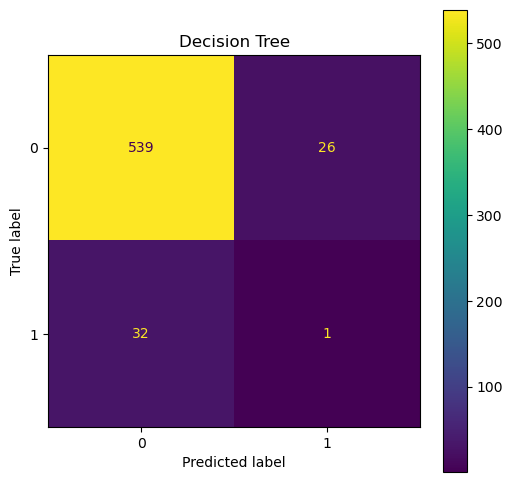

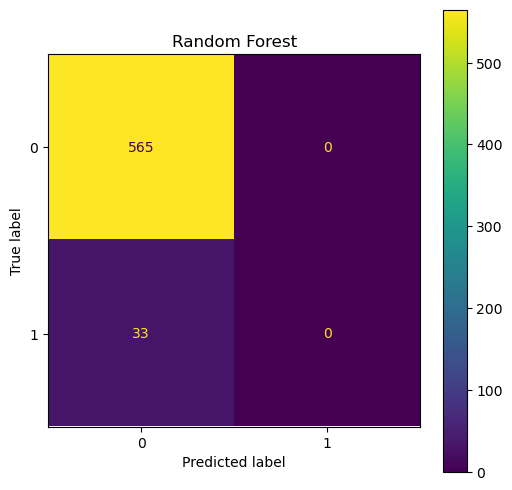

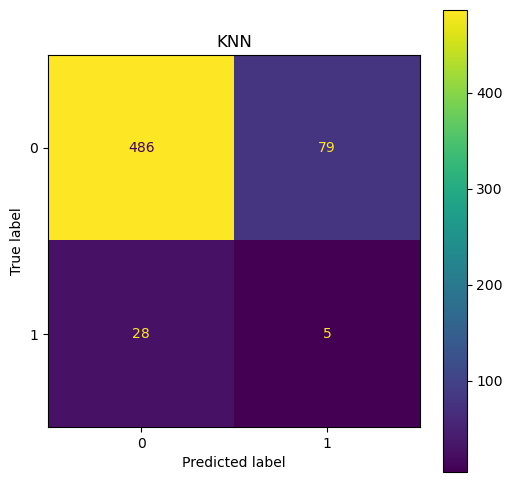

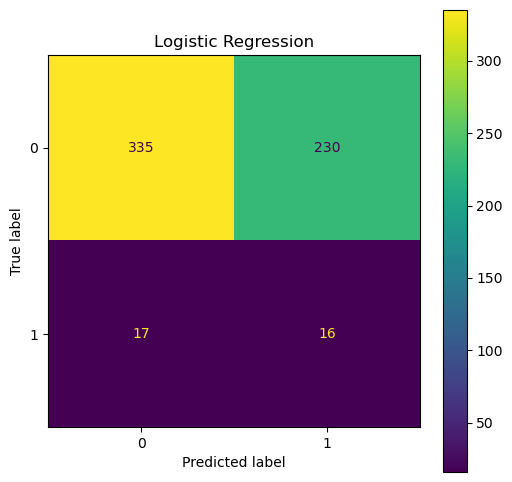

In [82]:
for name, y_pred in models.items():
    conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
    vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    vis.plot()
    plt.title(name)
    plt.show()

# Model Conclusions:

- Highest accuracy:
    - Random Forest
    - 94%
- Highest Precision (diagnosis=0):
    - KNN & Logistic-Regression
    - 95%
- Highest Precision (diagnosis=1):
    - Logistic-Regression
    - 7%
- Highest f1-score (diagnosis=0):
    - Random Forest
    - 0.97
- Highest f1-score (diagnosis=1):
    - Logistic Regression
    - 0.97

Overall I would choose the logistic regression model due to it having the highest sensitivity (recall score). This model would be used essentially as a screening tool for real diagnostic testing. Having healthy patients go through testing and finding out they have a negative diagnosis is preferable to patients with the condition being innaccurately non-diagnosed.

There is a lot of room for improvement in this model and dataset.
If possible, more samples (especially for diagnosis=1 samples) would potentially improve predictions &/or detect relationships between features & target.
Hyperperameter tuning should be a next step. I'd like to also compare a tuned KNN model alongside a tuned Logistic Regression model since the KNN was able to at least predict a few correct diagnosis=1 samples